---
title: "final"
format:
    html: true
    embed-resources: true
execute:
  echo: true
---

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization
import matplotlib.pyplot as plt # visualization
import warnings # suppress warnings
warnings.filterwarnings("ignore") 
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

pio.renderers.default = "plotly_mimetype+notebook_connected"

## Relationship between house price and salary

Background:

The United States is a country with a vast and diverse economy, with a large range of salaries and income levels. One significant factor that plays a crucial role in the overall economy is the real estate market. House prices in the US have been increasing significantly in recent years, leading to concerns about affordability and access to housing for many Americans.

The correlation between house prices and salaries in the US is a complex issue that is affected by many factors. Generally, housing affordability is determined by comparing the median income to the median home price. A ratio of three or less is considered affordable, while a ratio of five or more is considered unaffordable.

The purpose of this project is to analyze the relationship between house prices and salaries in the US, and to determine whether salary is the key reson to affect house price.

Methods:

First, I used the data from the US Census Bureau to analyze the relationship between house prices and salaries in the US. I do the EDA parts to check the dimension and median value of each columns. Then I check the distribution of the data by using the histogram and the correlation of each columns by using the heatmap. I use the median income and median home price to calculate the affordability ratio for each city. I use the affordability ratio to check the relationship between house prices and salaries in the US. I also use the affordability ratio which is specifically for the computer practitioner to check the relationship between house prices and salaries in eachcity. Finally, I will find the pattern and intrinsic Connection between house prices and salaries in the US.

In [213]:
df = pd.read_csv("SofwareDeveloperIncomeExpensesperUSACity.csv", usecols=lambda column: column != 'Unnamed: 0')
df.head()

,Metro,Mean Software Developer Salary (adjusted),Mean Software Developer Salary (unadjusted),Mean Unadjusted Salary (all occupations),Number of Software Developer Jobs,Median Home Price,City,Cost of Living avg,Rent avg,Cost of Living Plus Rent avg,Local Purchasing Power avg,City2,lat,lon
0,"San Jose-Sunnyvale-Santa Clara, CA",104964,137397,80480,78730,1193600,"Santa Clara, CA",1263.3,3470.9,4720.8,9589.6,Santa Clara,37.354113,-121.955174
1,"San Jose-Sunnyvale-Santa Clara, CA",104964,137397,80480,78730,1193600,"San Jose, CA",1041.5,3160.3,4083.6,9711.8,San Jose,37.343850,-121.883135
2,"San Francisco-Oakland-Hayward, CA",111017,142101,72400,59550,946700,"San Francisco, CA",1326.9,4163.3,5290.7,8216.7,San Francisco,37.779277,-122.419270
3,"San Francisco-Oakland-Hayward, CA",111017,142101,72400,59550,946700,"Oakland, CA",1313.0,3371.1,4754.9,6894.3,Oakland,37.804456,-122.271356
4,"Washington-Arlington-Alexandria, DC-VA-MD-WV",101188,119806,70980,63760,407700,"Washington, DC",1183.2,2821.2,4146.1,7517.5,Washington,38.894955,-77.036646


In [214]:
df.shape

(77, 14)

In [215]:
df.isna().sum()

Metro                                          0
Mean Software Developer Salary (adjusted)      0
Mean Software Developer Salary (unadjusted)    0
Mean Unadjusted Salary (all occupations)       0
Number of Software Developer Jobs              0
Median Home Price                              0
City                                           0
Cost of Living avg                             0
Rent avg                                       0
Cost of Living Plus Rent avg                   0
Local Purchasing Power avg                     0
City2                                          0
lat                                            0
lon                                            0
dtype: int64

In [216]:
print(df.median())

Mean Software Developer Salary (adjusted)      101256.000000
Mean Software Developer Salary (unadjusted)    100614.000000
Mean Unadjusted Salary (all occupations)        51050.000000
Number of Software Developer Jobs                8770.000000
Median Home Price                              243700.000000
Cost of Living avg                                995.000000
Rent avg                                         1625.800000
Cost of Living Plus Rent avg                     2999.900000
Local Purchasing Power avg                       7499.000000
lat                                                38.046407
lon                                               -89.383761
dtype: float64


In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 14 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Metro                                        77 non-null     object 
 1   Mean Software Developer Salary (adjusted)    77 non-null     int64  
 2   Mean Software Developer Salary (unadjusted)  77 non-null     int64  
 3   Mean Unadjusted Salary (all occupations)     77 non-null     int64  
 4   Number of Software Developer Jobs            77 non-null     int64  
 5   Median Home Price                            77 non-null     int64  
 6   City                                         77 non-null     object 
 7   Cost of Living avg                           77 non-null     float64
 8   Rent avg                                     77 non-null     float64
 9   Cost of Living Plus Rent avg                 77 non-null     float64
 10  Loca

<Axes: xlabel='Mean Software Developer Salary (unadjusted)', ylabel='Count'>

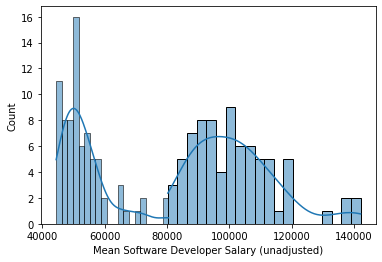

In [218]:
sns.histplot(df["Mean Software Developer Salary (unadjusted)"], bins=20, kde=True)
sns.histplot(df["Mean Unadjusted Salary (all occupations)"], bins=20, kde=True)


<Axes: >

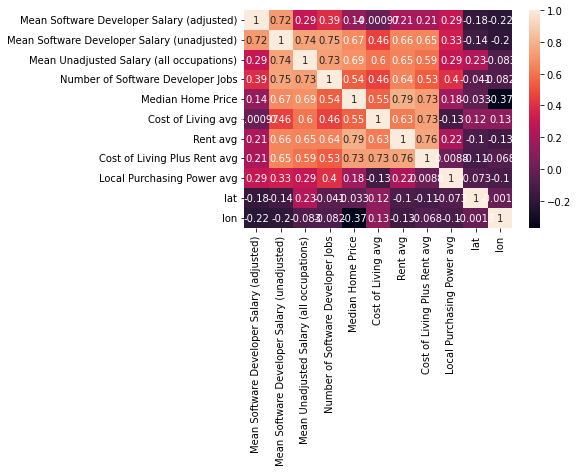

In [219]:
corr = df.corr(method="spearman") # data is not from a normal distribution
sns.heatmap(corr, annot=True)

<Axes: xlabel='Number of Software Developer Jobs', ylabel='Metro'>

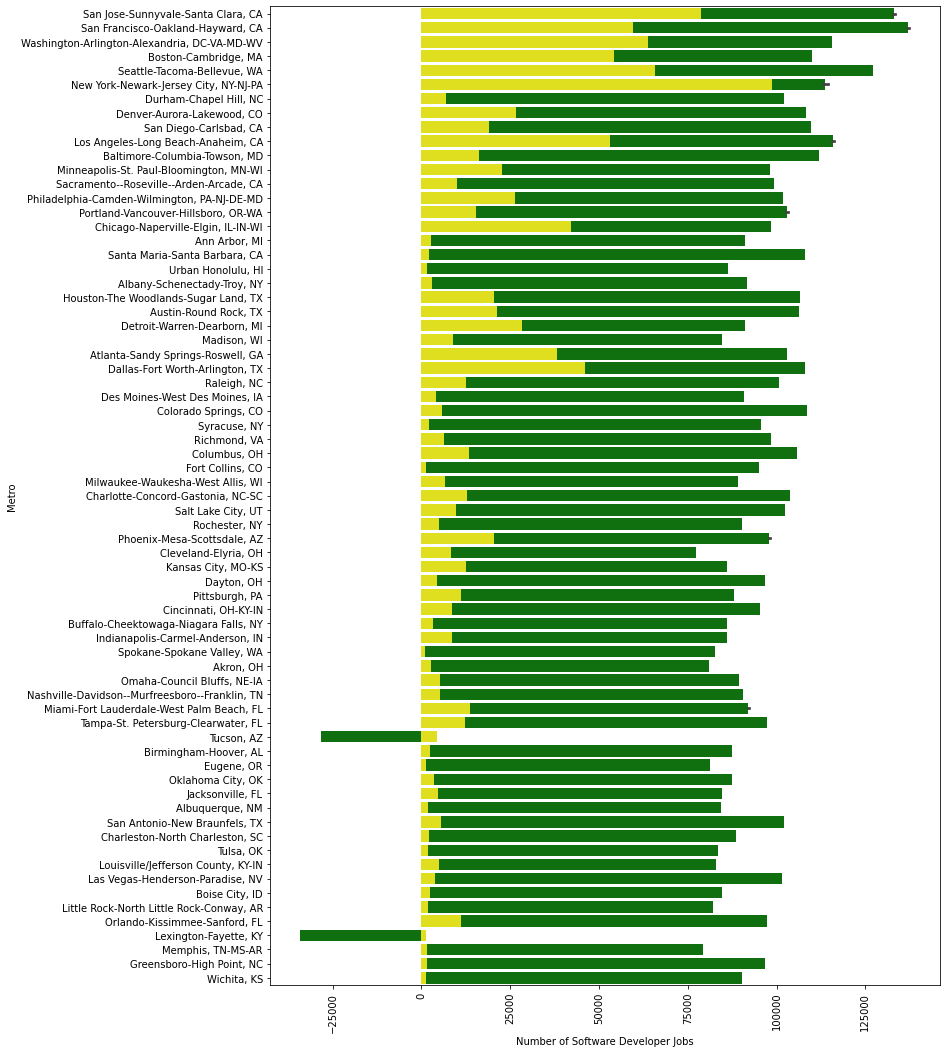

In [220]:
f, ax = plt.subplots(figsize=(12,18))
plt.xticks(rotation = 90)
df["MovePotential"] = df["Mean Software Developer Salary (unadjusted)"] - df["Cost of Living Plus Rent avg"]
sns.barplot(y=df["Metro"], x=df["MovePotential"], orient="h", color="green")
sns.barplot(y=df["Metro"], x=df["Number of Software Developer Jobs"], orient="h", color="yellow")

<Axes: xlabel='Local Purchasing Power avg', ylabel='Metro'>

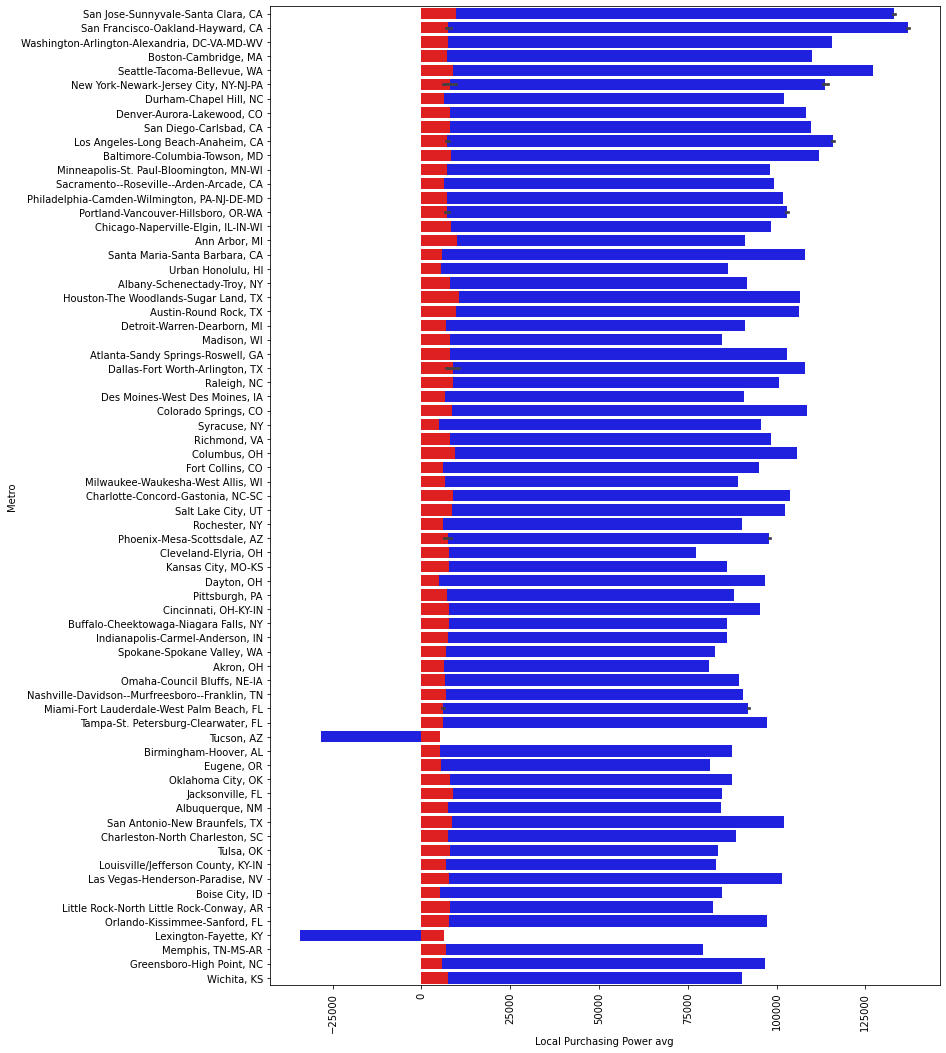

In [232]:
f, ax = plt.subplots(figsize=(12,18))
plt.xticks(rotation = 90)
df["MovePotential2"] = df["Mean Unadjusted Salary (all occupations)"] - df["Cost of Living Plus Rent avg"]
sns.barplot(y=df["Metro"], x=df["MovePotential"], orient="h", color="blue")
sns.barplot(y=df["Metro"], x=df["Local Purchasing Power avg"], orient="h", color="red")

In [234]:


df['text'] = df['City2'] + ' Mean Salary ' + (df['Mean Unadjusted Salary (all occupations)']).astype(str)+' dollars'
limits = [(0,1),(2,5),(6,10),(10,20),(20,76)]
colors = ["royalblue","crimson","lightseagreen","orange","lightgrey"]
cities = []


fig = go.Figure()

for i in range(len(limits)):
    lim = limits[i]
    df_sub1 = df[lim[0]:lim[1]]
    fig.add_trace(go.Scattergeo(
        uid="full-set",
        locationmode = 'USA-states',
        text = df_sub1['text'],
        lon = df_sub1['lon'],
        lat = df_sub1['lat'],
        marker = dict(
            size = df_sub1['Mean Unadjusted Salary (all occupations)']/100,
            color = colors[i],
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode = 'area'
        ),
        name = '{0} - {1}'.format(lim[0],lim[1])))

fig.update_layout(
        title_text = '2022 US city Salaries<br>(Click legend to toggle traces)',
        showlegend = True,
        geo = dict(
            scope = 'usa',
            landcolor = 'rgb(217, 217, 217)',
        )
    )

fig.show()

Results:

After ranking the cities by meean income, We can get a clear a pattern that the cities with higher mean income are located in the west coast and the east coast. The cities with lower mean income are located in the midwest and the south. The cities with the highest mean income are San Jose, San Francisco, and San Diego. The cities with the lowest mean income are Memphis, Birmingham, and Jackson.

So to conclude, the correlation between house prices and salaries in the US is particularly pronounced in areas with a high demand for housing, such as large urban centers. For example, in cities like San Francisco, Los Angeles, and New York, the median home price is significantly higher than the national average, while the median income is also higher than the national average.In some areas, particularly in rural areas or smaller cities, the correlation between house prices and salaries is not as pronounced. These areas typically have lower home prices and lower median incomes, leading to a more affordable cost of living.


In [233]:

df2 = pd.read_csv("2022_us_cities.csv")
df2.head()

df2['text'] = df2['name'] + '<br>Population ' + (df2['pop']/1e6).astype(str)+' million'
limits = [(0,2),(3,10),(11,20),(21,50),(50,3000)]
colors = ["royalblue","crimson","lightseagreen","orange","lightgrey"]
cities = []
scale = 5000

fig = go.Figure()

for i in range(len(limits)):
    lim = limits[i]
    df_sub = df2[lim[0]:lim[1]]
    fig.add_trace(go.Scattergeo(
        locationmode = 'USA-states',
        lon = df_sub['lon'],
        lat = df_sub['lat'],
        text = df_sub['text'],
        marker = dict(
            size = df_sub['pop']/scale,
            color = colors[i],
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode = 'area'
        ),
        name = '{0} - {1}'.format(lim[0],lim[1])))

fig.update_layout(
        title_text = '2022 US city populations<br>(Click legend to toggle traces)',
        showlegend = True,
        geo = dict(
            scope = 'usa',
            landcolor = 'rgb(217, 217, 217)',
        )
    )

fig.show()

Results:

After ranking the cities by population, we can get a clear a pattern that the cities with higher population are located in the west coast and the east coast. The cities with lower population are located in the midwest and the south. The cities with the highest population are New York, Los Angeles, and Chicago. The cities with the lowest population are Cheyenne, Pierre, and Lincoln. This is consistent with the pattern we found in the previous salaries analysis. This is because the cities with higher population are located in the west coast and the east coast, which are also the cities with higher salaries. People tend to live in the cities with higher salaries. 

Conclusion:

the correlation between house prices and salaries in the US is a complex issue that is influenced by many factors. While the relationship between the two is generally positive, it is affected by economic factors, added with government policies and regulations. As the cost of housing continues to increase in many areas of the US, policymakers will need to consider strategies to increase affordability and ensure access to housing for all Americans.
